# Import libraries

The `brisk` library is a custom-made Python library for the import, analysis and visualization of data from the BRISK project.
It comprises scripts and modules for managing data. All the main functions will be compiled in a script in order to be able to use all the functions outside the Python environment

A guide for the installation and the setup of the database, together with the list of scripts will be provided when the whole analysis is set up.

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import warnings

import brisk.visualization.plots_imu as imu
from brisk.utils import path
from brisk.analysis import segmentation

warnings.filterwarnings('ignore')

# List all the subjects

In the `brisk` library, a series of functions for the description of the database (number of subjects, number of trials) is provided.

In [26]:
subjects = path.get_subjects()
print(subjects)

subject = 'giovanni'
trials = path.get_trials(subject)
print(trials)

['giovanni', 'luca', 'micheal', 'simone']
['full', 'full_robot', 'half_robot', 'half_robot_touch']


# Visualize IMU data for one subject

Functions are provided also for the visualization of raw data (after a 5Hz LP filter)

<span style="color: red; font-weight: bold">Note</span> AP, ML and VT directions are defined during the neutral pose (arms parallel to the ground)

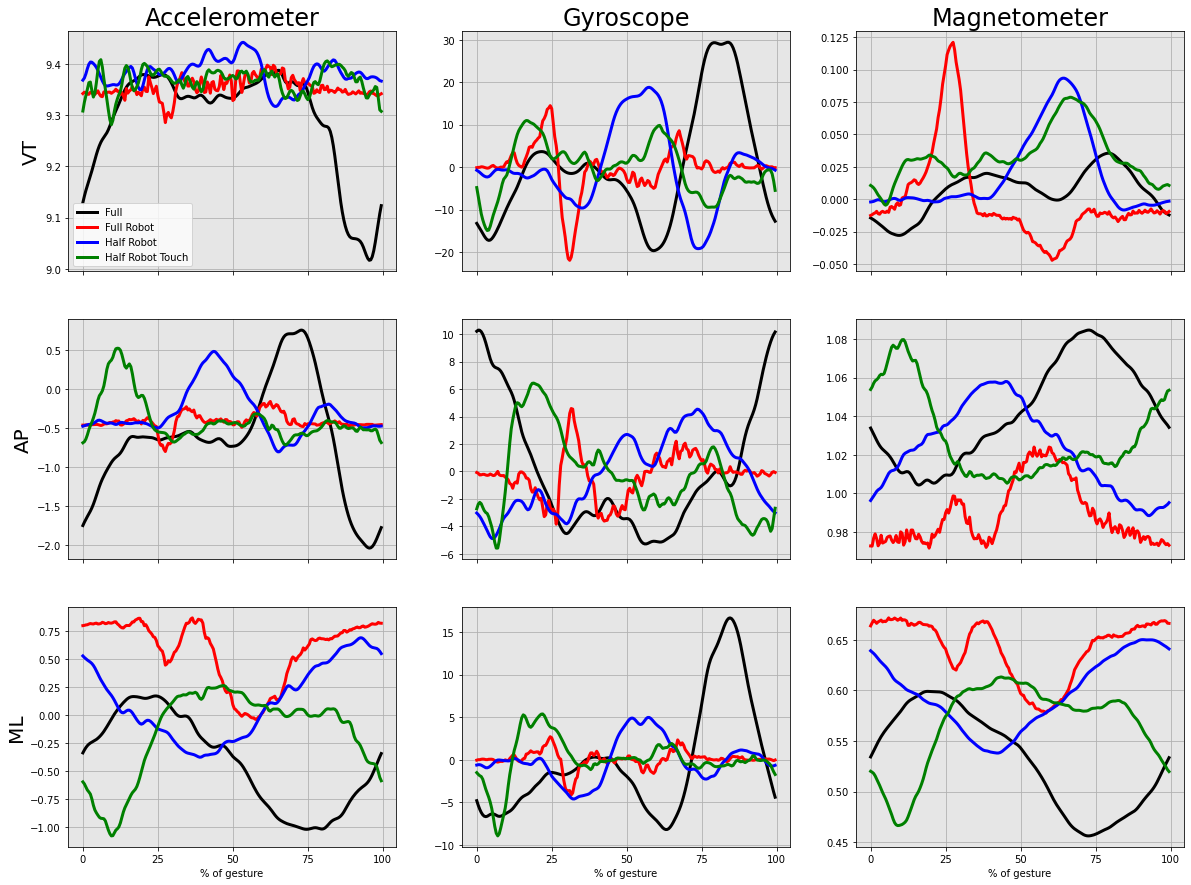

In [27]:
segment = 'trunk'
imu.plot_all_trials('giovanni', 'trunk')

# Get gesture frequency

All the quantitative analyses on the data will be hard-coded in the library, to ensure repeatability. Here, an example of the analysis of the speed of gestures, in terms of packages per minute

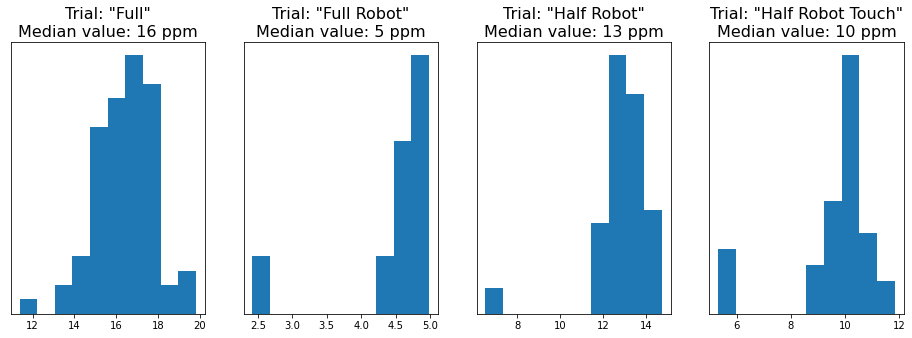

In [28]:
frequencies = segmentation.get_frequencies(subject)

fig, ax = plt.subplots(1,4,figsize=(16,5))
for i, k in enumerate(frequencies.keys()):
    ax[i].hist(frequencies[k])
    ax[i].set_title(
        f'Trial: \"{k.replace("_"," ").title()}\"\nMedian value: {np.median(frequencies[k]):.0f} ppm',
        fontsize=16
    )
    ax[i].set_yticks([])

# Time parameters

Frequencies and durations are selected as time-related global parameters

In [29]:
from brisk.analysis import parameters

tp = parameters.get_time_parameters(subject)
for k,v in tp.items():
    print(f'Trial {k.replace("_"," ").title()}, {v["all_frequency"].size} trials after outliers removal')
    print(f'\tAverage frequency: {v["avg_frequency"]:.0f} PPM')
    print(f'\tAverage duration: {v["avg_duration"]:.2f} s')
    print(f'\tVariability of duration: {v["std_duration"]:.2f} s')
    print()

Trial Full, 66 trials after outliers removal
	Average frequency: 16 PPM
	Average duration: 3.64 s
	Variability of duration: 0.34 s

Trial Full Robot, 17 trials after outliers removal
	Average frequency: 5 PPM
	Average duration: 13.02 s
	Variability of duration: 0.78 s

Trial Half Robot, 48 trials after outliers removal
	Average frequency: 13 PPM
	Average duration: 4.61 s
	Variability of duration: 0.30 s

Trial Half Robot Touch, 33 trials after outliers removal
	Average frequency: 10 PPM
	Average duration: 5.97 s
	Variability of duration: 0.44 s



# Extraction of the cycle based parameters

The cycle based parameters are:

- RMS value during the event (after removing mean value)
- Smoothness during the event (after removing mean value), described via the negative log-dimensionless jerk (i.e. more negative, less smooth)
- Value range during the event

All the parameters have been calculated on the 3 spatial component and on the global (total) value, of both accelerometer and gyroscope data

In [30]:
from brisk.analysis.segmentation import get_filtered_data, load_indexes

param = parameters.cycle_parameters(subject)

# Extraction of the global parameters

In addition to the average value of the cycle parameters, regularity (i.e. value of the first peak of the autocorrelation) has been used as a parameter

In [31]:
pp = parameters.global_parameters(subject)

# Plots

In [32]:
import seaborn as sns

plot_options = {
    'notch':True, 
    'boxprops':{
        'linewidth': 2, 
        'edgecolor': [0,0.2,0.7], 
        'facecolor': 'w'
    }, 
    'medianprops':{
        'linewidth': 4, 
        'color': 'g'
    }, 
    'showfliers':False
}
segments = np.unique(param['segment'])
dimensions = np.unique(param['dimension'])
parameter_name = np.unique([x.split('_')[0] for x in param.columns if '_' in x])
sensor_name = np.unique([x.split('_')[1] for x in param.columns if '_' in x])
trials_labels = [x.replace('_',' ').title() for x in np.unique(param['trial'])]

print(segments)
print(dimensions)
print(parameter_name)
print(sensor_name)

['arm' 'forearm' 'trunk']
['global' 'x' 'y' 'z']
['range' 'rms' 'smoothness']
['acc' 'gyr']


## Accelerometer

In [33]:
sensor = 'acc'

### Trunk

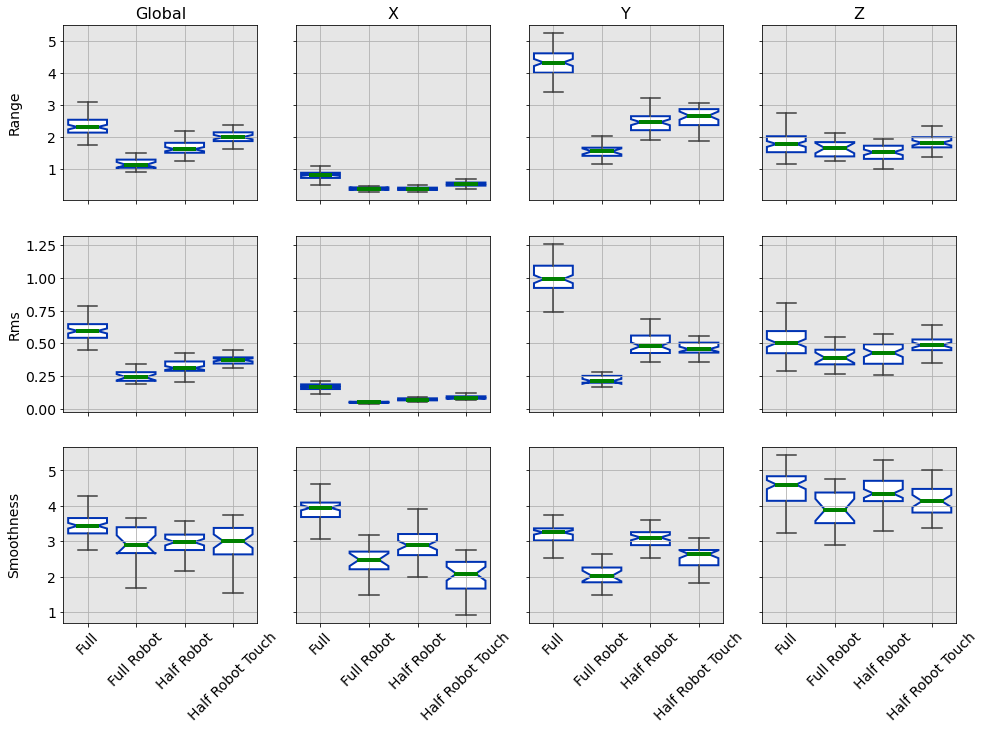

In [34]:
segment = 'trunk'

fig, ax = plt.subplots(len(parameter_name), len(dimensions), figsize=(16,11), facecolor='w', sharex=True, sharey='row')

for i,p in enumerate(parameter_name):
    for j,d in enumerate(dimensions):
        sns.boxplot(
            data=param[(param['segment'] == segment) & (param['dimension'] == d)],
            x = 'trial',
            y = p+'_'+sensor,
            ax = ax[i,j],
            **plot_options
        )
        ax[i,j].grid('on')
        ax[i,j].set_xticklabels(trials_labels, rotation=45, fontsize=14)
        ax[i,j].tick_params(axis='y', labelsize=14)
        ax[i,j].set_facecolor([0.9,0.9,0.9])
        ax[i,j].set_xlabel('')
        ax[i,j].set_ylabel(p.replace('_',' ').title(), fontsize=14)

for a in ax[:,1:].flatten():
    a.set_ylabel('')
for i, d in enumerate(dimensions):
    ax[0,i].set_title(d.title(), fontsize=16)
fig.align_ylabels(ax)
plt.show()

### Arm

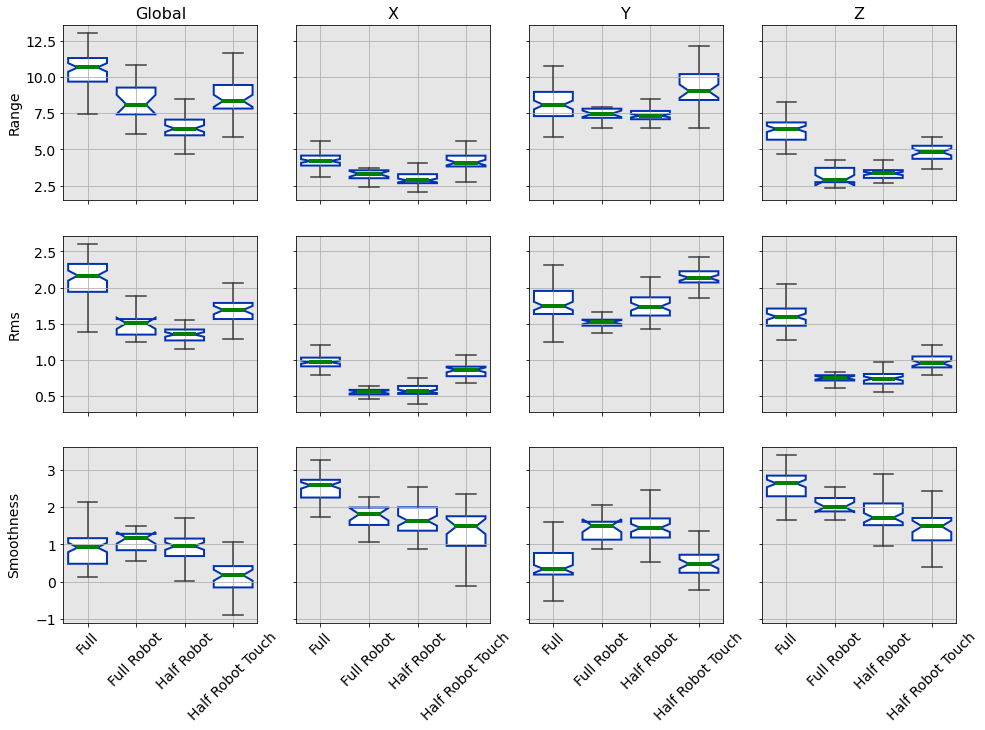

In [35]:
segment = 'arm'

fig, ax = plt.subplots(len(parameter_name), len(dimensions), figsize=(16,11), facecolor='w', sharex=True, sharey='row')

for i,p in enumerate(parameter_name):
    for j,d in enumerate(dimensions):
        sns.boxplot(
            data=param[(param['segment'] == segment) & (param['dimension'] == d)],
            x = 'trial',
            y = p+'_'+sensor,
            ax = ax[i,j],
            **plot_options
        )
        ax[i,j].grid('on')
        ax[i,j].set_xticklabels(trials_labels, rotation=45, fontsize=14)
        ax[i,j].tick_params(axis='y', labelsize=14)
        ax[i,j].set_facecolor([0.9,0.9,0.9])
        ax[i,j].set_xlabel('')
        ax[i,j].set_ylabel(p.replace('_',' ').title(), fontsize=14)

for a in ax[:,1:].flatten():
    a.set_ylabel('')
for i, d in enumerate(dimensions):
    ax[0,i].set_title(d.title(), fontsize=16)
fig.align_ylabels(ax)
plt.show()

### Forearm

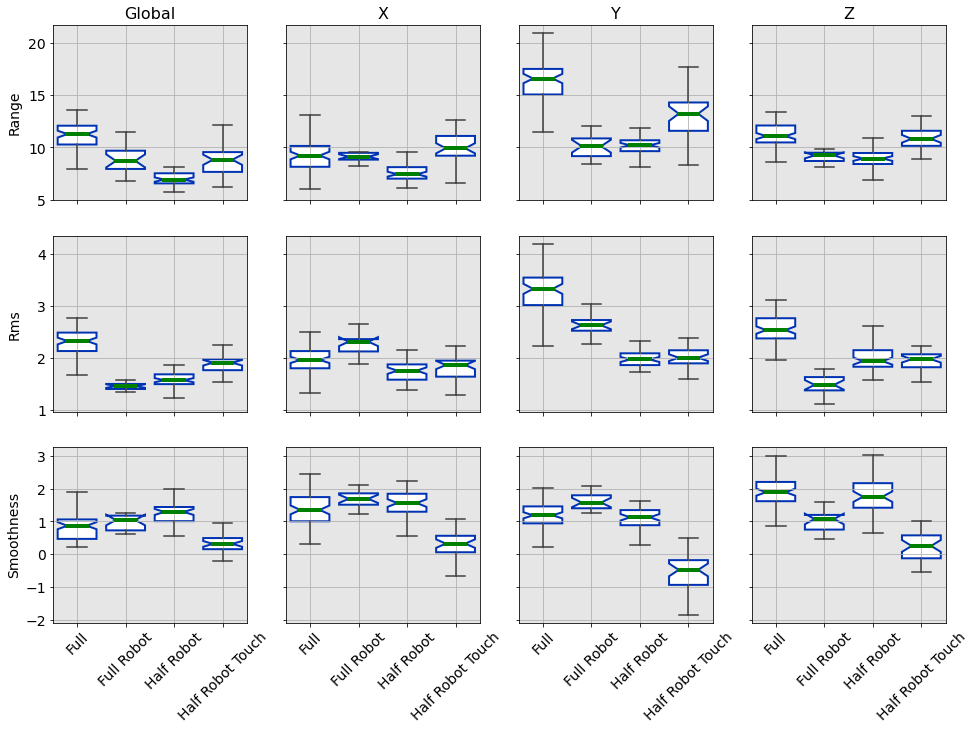

In [36]:
segment = 'forearm'

fig, ax = plt.subplots(len(parameter_name), len(dimensions), figsize=(16,11), facecolor='w', sharex=True, sharey='row')

for i,p in enumerate(parameter_name):
    for j,d in enumerate(dimensions):
        sns.boxplot(
            data=param[(param['segment'] == segment) & (param['dimension'] == d)],
            x = 'trial',
            y = p+'_'+sensor,
            ax = ax[i,j],
            **plot_options
        )
        ax[i,j].grid('on')
        ax[i,j].set_xticklabels(trials_labels, rotation=45, fontsize=14)
        ax[i,j].tick_params(axis='y', labelsize=14)
        ax[i,j].set_facecolor([0.9,0.9,0.9])
        ax[i,j].set_xlabel('')
        ax[i,j].set_ylabel(p.replace('_',' ').title(), fontsize=14)

for a in ax[:,1:].flatten():
    a.set_ylabel('')
for i, d in enumerate(dimensions):
    ax[0,i].set_title(d.title(), fontsize=16)
fig.align_ylabels(ax)
plt.show()

## Gyroscope

In [37]:
sensor = 'gyr'

### Trunk

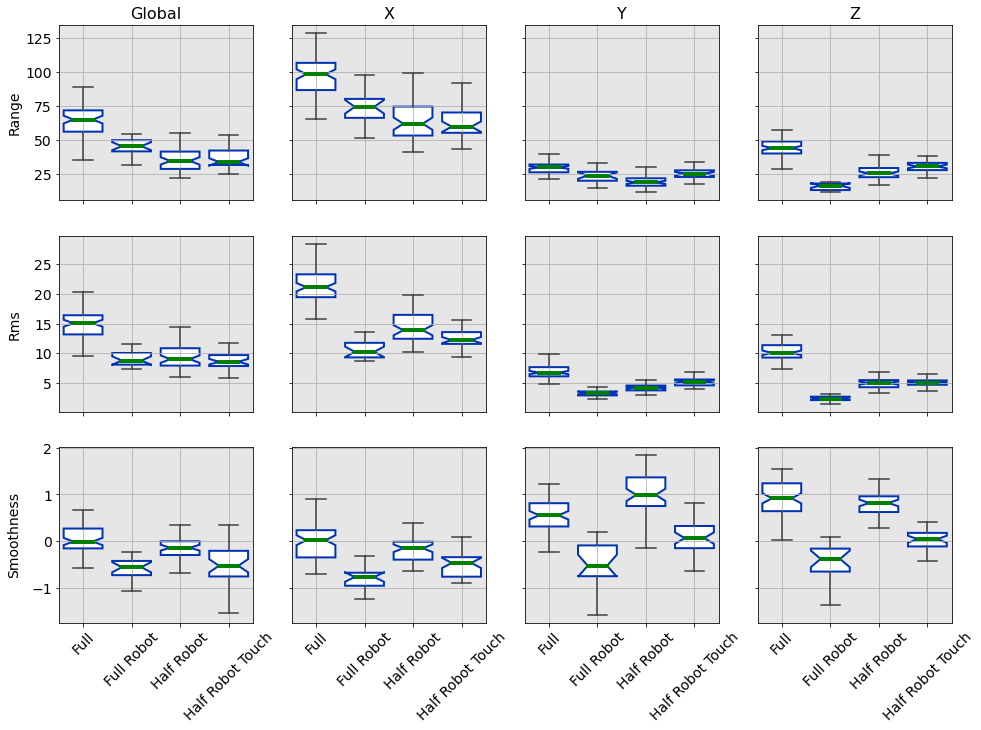

In [38]:
segment = 'trunk'

fig, ax = plt.subplots(len(parameter_name), len(dimensions), figsize=(16,11), facecolor='w', sharex=True, sharey='row')

for i,p in enumerate(parameter_name):
    for j,d in enumerate(dimensions):
        sns.boxplot(
            data=param[(param['segment'] == segment) & (param['dimension'] == d)],
            x = 'trial',
            y = p+'_'+sensor,
            ax = ax[i,j],
            **plot_options
        )
        ax[i,j].grid('on')
        ax[i,j].set_xticklabels(trials_labels, rotation=45, fontsize=14)
        ax[i,j].tick_params(axis='y', labelsize=14)
        ax[i,j].set_facecolor([0.9,0.9,0.9])
        ax[i,j].set_xlabel('')
        ax[i,j].set_ylabel(p.replace('_',' ').title(), fontsize=14)

for a in ax[:,1:].flatten():
    a.set_ylabel('')
for i, d in enumerate(dimensions):
    ax[0,i].set_title(d.title(), fontsize=16)
fig.align_ylabels(ax)
plt.show()

### Arm

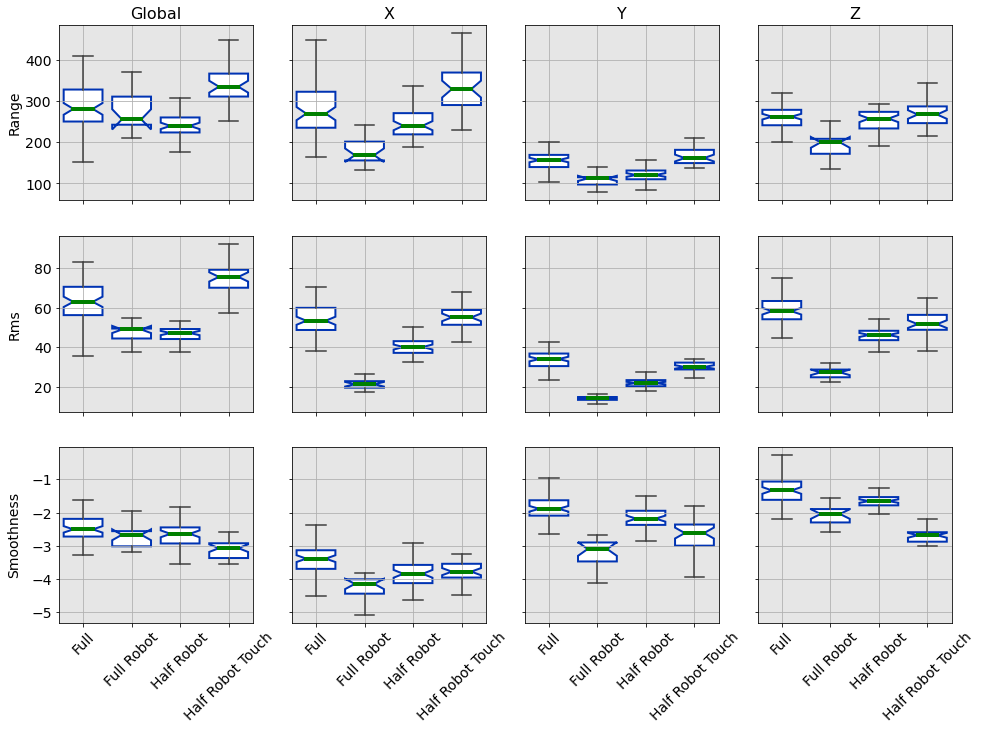

In [39]:
segment = 'arm'

fig, ax = plt.subplots(len(parameter_name), len(dimensions), figsize=(16,11), facecolor='w', sharex=True, sharey='row')

for i,p in enumerate(parameter_name):
    for j,d in enumerate(dimensions):
        sns.boxplot(
            data=param[(param['segment'] == segment) & (param['dimension'] == d)],
            x = 'trial',
            y = p+'_'+sensor,
            ax = ax[i,j],
            **plot_options
        )
        ax[i,j].grid('on')
        ax[i,j].set_xticklabels(trials_labels, rotation=45, fontsize=14)
        ax[i,j].tick_params(axis='y', labelsize=14)
        ax[i,j].set_facecolor([0.9,0.9,0.9])
        ax[i,j].set_xlabel('')
        ax[i,j].set_ylabel(p.replace('_',' ').title(), fontsize=14)

for a in ax[:,1:].flatten():
    a.set_ylabel('')
for i, d in enumerate(dimensions):
    ax[0,i].set_title(d.title(), fontsize=16)
fig.align_ylabels(ax)
plt.show()

### Forearm

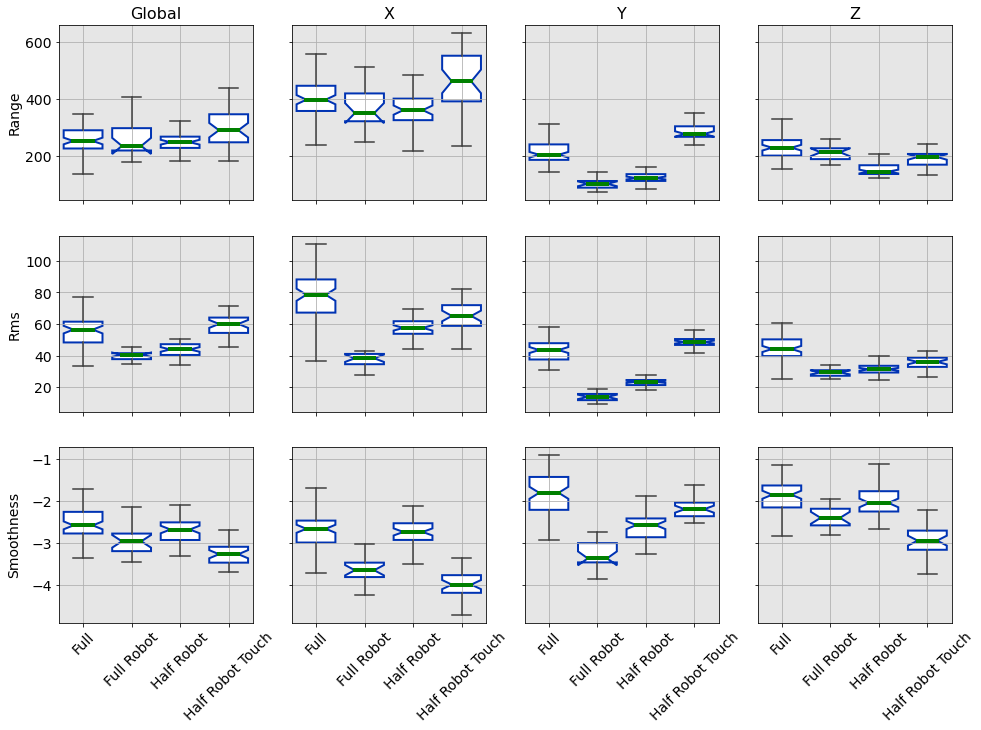

In [40]:
segment = 'forearm'

fig, ax = plt.subplots(len(parameter_name), len(dimensions), figsize=(16,11), facecolor='w', sharex=True, sharey='row')

for i,p in enumerate(parameter_name):
    for j,d in enumerate(dimensions):
        sns.boxplot(
            data=param[(param['segment'] == segment) & (param['dimension'] == d)],
            x = 'trial',
            y = p+'_'+sensor,
            ax = ax[i,j],
            **plot_options
        )
        ax[i,j].grid('on')
        ax[i,j].set_xticklabels(trials_labels, rotation=45, fontsize=14)
        ax[i,j].tick_params(axis='y', labelsize=14)
        ax[i,j].set_facecolor([0.9,0.9,0.9])
        ax[i,j].set_xlabel('')
        ax[i,j].set_ylabel(p.replace('_',' ').title(), fontsize=14)

for a in ax[:,1:].flatten():
    a.set_ylabel('')
for i, d in enumerate(dimensions):
    ax[0,i].set_title(d.title(), fontsize=16)
fig.align_ylabels(ax)
plt.show()

# Global parameters

Here all the global parameters (number of events, median values for the cycle-based parameters and regularity) are shown.

In [41]:
pp.sort_values(axis=0,by=['segment','dimension']).set_index(['segment','dimension','trial']).head(pp.shape[0])

smoothness_acc  range_acc   rms_acc  \
segment dimension trial                                                   
arm     global    full                    0.907916  10.384519  2.125822   
                  full_robot              1.003231   8.376700  1.495132   
                  half_robot              0.906570   6.477019  1.336300   
                  half_robot_touch        0.104404   8.421794  1.688313   
        x         full                    2.489213   4.241239  0.978518   
                  full_robot              1.681686   3.236369  0.549319   
                  half_robot              1.636400   2.999498  0.570687   
                  half_robot_touch        1.354870   4.181781  0.849228   
        y         full                    0.473069   8.176537  1.774404   
                  full_robot              1.288610   7.539470  1.516965   
                  half_robot              1.423644   7.438357  1.743485   
                  half_robot_touch        0.459872   9.338527  2.153689   
        z         full                    2.559962   6.384777  1.599843   
                  full_robot              1.954459   3.183700  0.744162   
                  half_robot              1.759567   3.351402  0.741276   
                  half_robot_touch        1.407033   4.890964  0.969979   
forearm global    full                    0.863496  11.043327  2.287529   
                  full_robot              0.900599   8.853040  1.449540   
                  half_robot              1.188372   6.986661  1.579053   
                  half_robot_touch        0.210367   8.816955  1.896137   
        x         full                    1.367490   9.214859  1.987044   
                  full_robot              1.593012   9.426673  2.280563   
                  half_robot              1.533583   7.631596  1.741569   
                  half_robot_touch        0.231628   9.920548  1.809360   
        y         full                    1.184161  16.104051  3.267089   
                  full_robot              1.527450  10.031772  2.636929   
                  half_robot              1.033011  10.321690  1.974177   
                  half_robot_touch       -0.553024  13.065355  2.010220   
        z         full                    1.862032  11.026166  2.491453   
                  full_robot              0.925203   9.345358  1.496334   
                  half_robot              1.791939   8.923556  1.981069   
                  half_robot_touch        0.158265  10.862179  1.949966   
trunk   global    full                    3.443748   2.333765  0.599923   
                  full_robot              2.932628   1.162658  0.249726   
                  half_robot              2.911158   1.658954  0.324891   
                  half_robot_touch        2.904059   2.005001  0.375423   
        x         full                    3.911569   0.811945  0.167727   
                  full_robot              2.387228   0.387557  0.050068   
                  half_robot              2.912418   0.396361  0.072906   
                  half_robot_touch        2.038212   0.531889  0.087715   
        y         full                    3.191355   4.321402  0.995316   
                  full_robot              1.925193   1.547985  0.221363   
                  half_robot              3.037802   2.467407  0.491550   
                  half_robot_touch        2.465005   2.642306  0.470574   
        z         full                    4.496243   1.797276  0.511593   
                  full_robot              3.934888   1.631639  0.396410   
                  half_robot              4.352046   1.524812  0.416591   
                  half_robot_touch        4.053030   1.839716  0.489477   

                                    smoothness_gyr   range_gyr    rms_gyr  \
segment dimension trial                                                     
arm     global    full                   -2.462802  285.547085  62.939273   
                  full_robot             -2.828902  28